In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "^spx_d.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "^spx_d.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "^spx_d.csv"
print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

Path exists: True


,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [2]:
# filter DatetimeIndex higher than year 1957
df = df[df.index > '1957-01-01']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17355 entries, 1957-01-02 to 2025-12-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    17355 non-null  float64
 1   high    17355 non-null  float64
 2   low     17355 non-null  float64
 3   close   17355 non-null  float64
 4   volume  17355 non-null  float64
dtypes: float64(5)
memory usage: 813.5 KB


In [3]:
df.shape

(17355, 5)

In [4]:
# # plot close prices over time
# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['close'], label='Close Price')
# plt.title('S&P 500 Close Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()
# plt.show()

In [5]:
# calculate daily returns
df['daily_return'] = df['close'].pct_change()

# fill NaN values
df.fillna(0, inplace=True)

df.head()

,open,high,low,close,volume,daily_return
date,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,0.000000
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,0.008658
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,0.001288
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,-0.005144
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,-0.003662


In [6]:
"""
"Buy the dip" strategy implementation:

1) Identify the dips: Define a dip as a negative daily return. 
Create a new column in the dataframe to signal when a dip occurs. Example, signal 1 the day after a negative return.

2) Buy signal: When a dip is identified, generate a buy signal at open price. 
This can be a simple binary signal (1 for buy, 0 for no buy).

3) Holding period: Define a holding period after the buy signal. All positions will be held for the current day only.
Closed at the close price of the same day.

4) Backtesting: Implement a backtesting framework to evaluate the performance of the strategy over historical data. 
Additionally, plot the signals on the price chart for visual confirmation.

5) Performance metrics: Calculate key performance metrics such as total return, maximum drawdown, and win rate.

# =========================================================
This is not a tradable strategy, just an academic exercise.
# =========================================================
""";
# add year column
df['year'] = df.index.year

# add dip signal column
df['dip_signal'] = np.where(df['daily_return'] < 0, 1, 0)

# shift the signal to the next day to represent buy signal at open after dip
df['buy_signal'] = df['dip_signal'].shift(1)

# fill nan values
df.fillna(0, inplace=True)

# calculate strategy returns
df['strategy_return'] = df['buy_signal'] * df['daily_return']

df.head(10)

,open,high,low,close,volume,daily_return,year,dip_signal,buy_signal,strategy_return
date,,,,,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,0.000000,1957,0,0.0,0.000000
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,0.008658,1957,0,0.0,0.000000
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,0.001288,1957,0,0.0,0.000000
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,-0.005144,1957,1,0.0,-0.000000
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,-0.003662,1957,1,1.0,-0.003662
1957-01-09,46.16,46.16,46.16,46.16,1294444.0,-0.001946,1957,1,1.0,-0.001946
1957-01-10,46.27,46.27,46.27,46.27,1372222.0,0.002383,1957,0,1.0,0.002383
1957-01-11,46.18,46.18,46.18,46.18,1300000.0,-0.001945,1957,1,0.0,-0.000000
1957-01-14,45.86,45.86,45.86,45.86,1305556.0,-0.006929,1957,1,1.0,-0.006929


In [7]:
# years list included in the dataframe
years = df['year'].unique().tolist()

# select last year
last_year = years[-1]

# filter dataframe for last year only
df_last_year = df[df['year'] == last_year]

In [8]:
last_year

2025

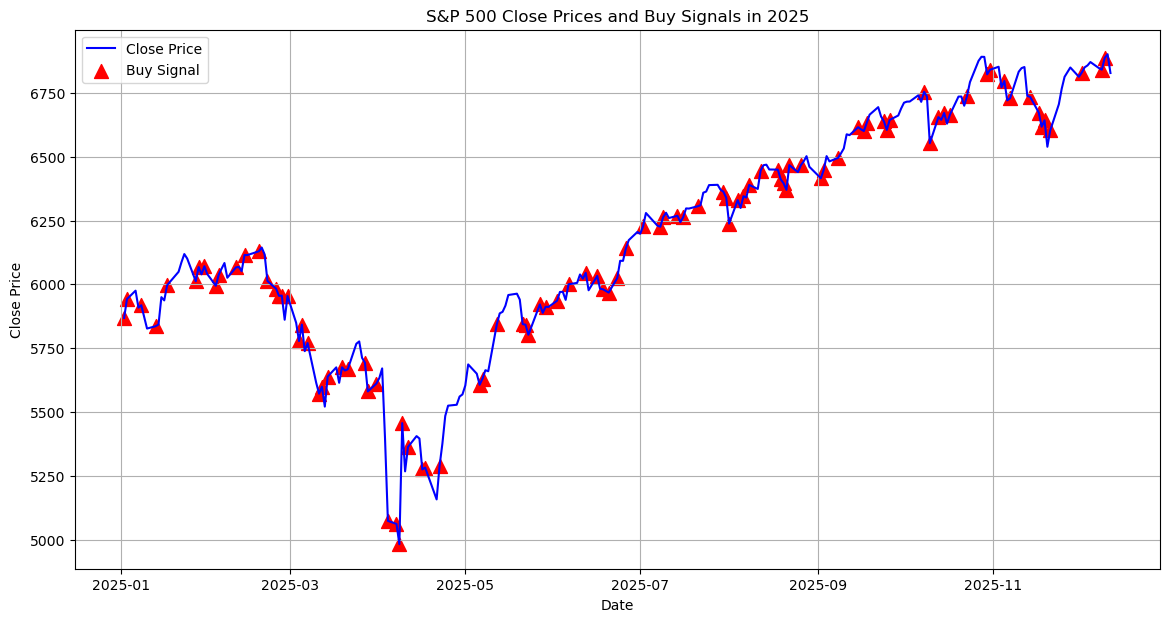

In [9]:
# plot close prices and buy signals for the last year
plt.figure(figsize=(14, 7))
plt.plot(df_last_year.index, df_last_year['close'], label='Close Price', color='blue')
plt.scatter(df_last_year.index[df_last_year['buy_signal'] == 1], df_last_year['close'][df_last_year['buy_signal'] == 1], 
            label='Buy Signal', color='red', marker='^', s=100) 
plt.title(f'S&P 500 Close Prices and Buy Signals in {last_year}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

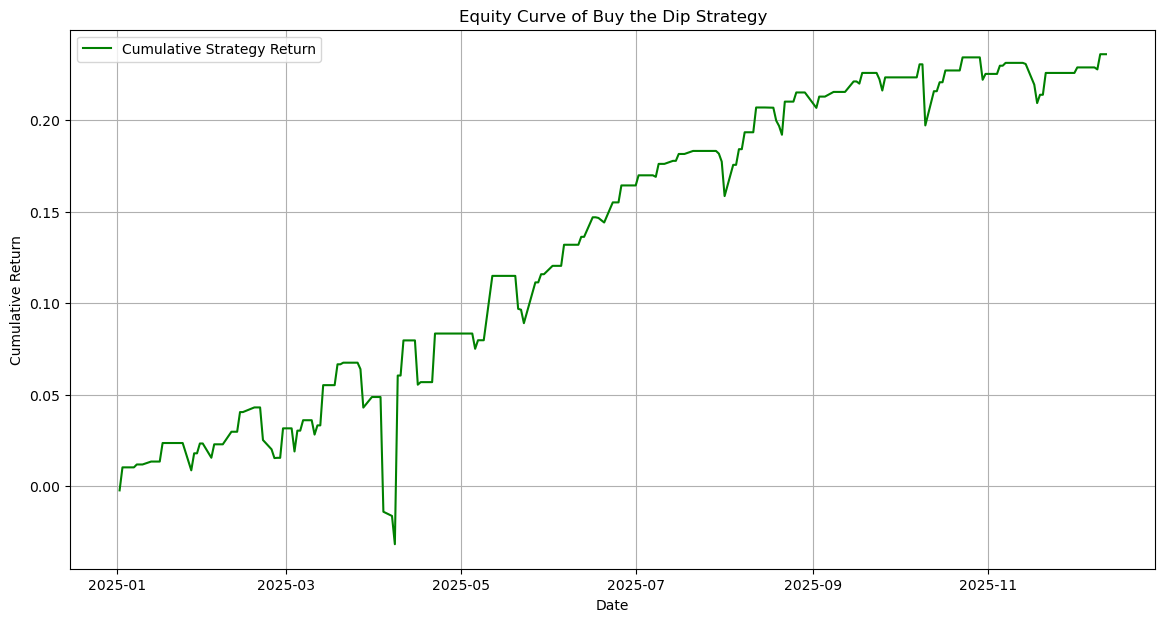

In [10]:
# plot equity curve as cumulative simple returns of strategy_return
df_last_year['cumulative_strategy_return'] = (1 + df_last_year['strategy_return']).cumprod() - 1
plt.figure(figsize=(14, 7))
plt.plot(df_last_year.index, df_last_year['cumulative_strategy_return'], label='Cumulative Strategy Return', color='green')
plt.title('Equity Curve of Buy the Dip Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# calculate total return of the strategy
total_return = df_last_year['cumulative_strategy_return'].iloc[-1] 
print(f'Total Return of Buy the Dip Strategy for Year {df_last_year.index.year[-1]}: {total_return * 100:.2f}%')

Total Return of Buy the Dip Strategy for Year 2025: 23.60%
